In [1]:
!pip install fastai

In [2]:
from fastai.vision.all import *
from pathlib import Path


In [3]:
from pathlib import Path

path = Path("./Crop___Disease")


In [4]:
dls = ImageDataLoaders.from_folder(
    path,
    valid_pct=0.2,     # 80% train, 20% validation
    seed=42,
    item_tfms=Resize(460),
    batch_tfms=aug_transforms(size=224),
    bs=32
)

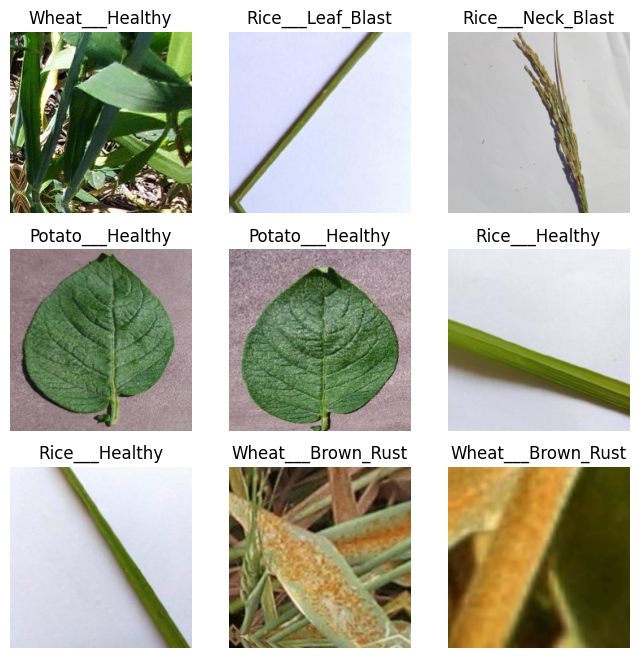

In [5]:

dls.show_batch(max_n=9, figsize=(8,8))


In [8]:
from fastai.vision.all import *

learn = vision_learner(dls, resnet50, metrics=accuracy)

In [9]:
learn.fine_tune(5)

epoch,train_loss,valid_loss,accuracy,time
0,0.579865,0.311894,0.882788,26:14


epoch,train_loss,valid_loss,accuracy,time
0,0.334546,0.206033,0.926082,31:21
1,0.257015,0.176785,0.942978,31:30
2,0.174474,0.147405,0.954065,34:21
3,0.139123,0.108622,0.963041,37:32
4,0.117740,0.101156,0.963569,34:57


In [10]:
learn.export("crop_disease_model.pkl")


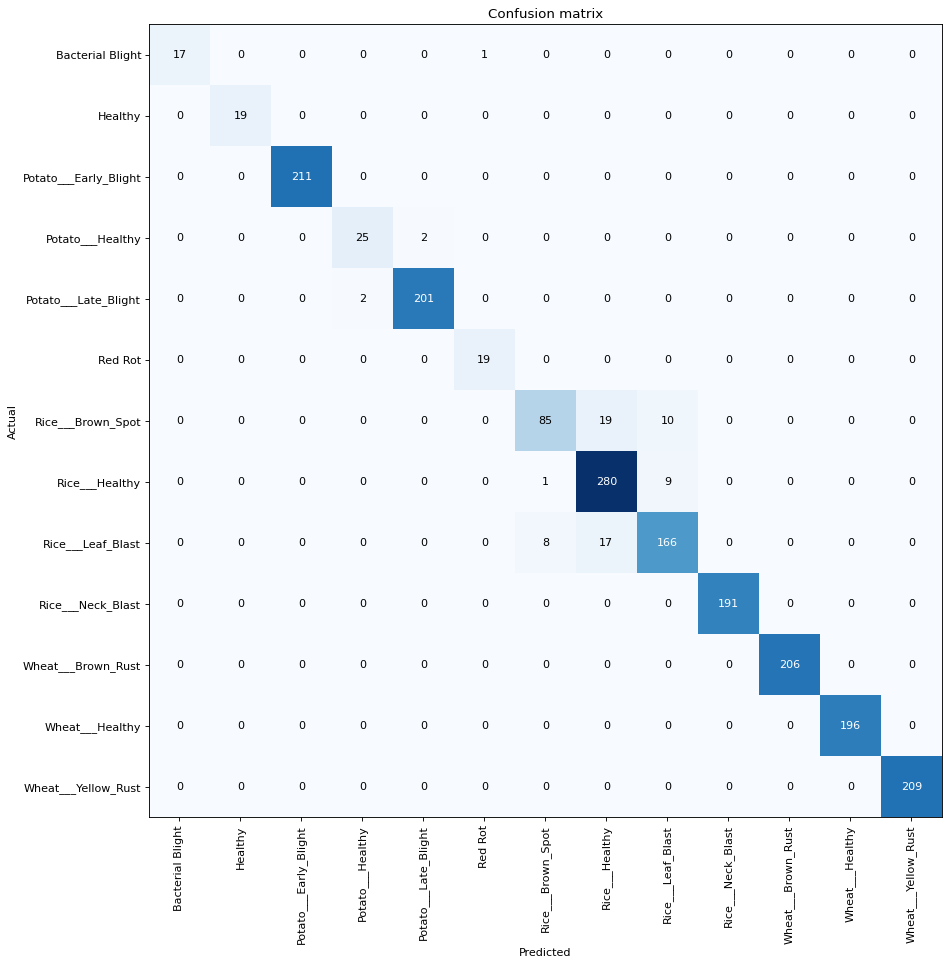

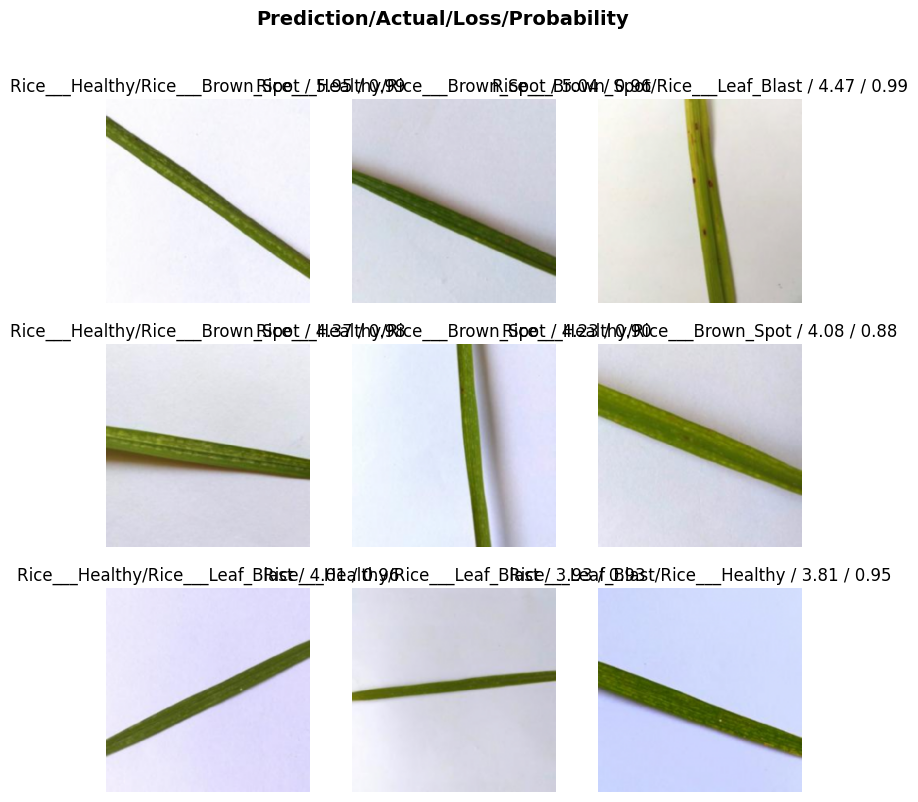

In [11]:
from fastai.interpret import ClassificationInterpretation

# Get predictions and interpretations
interp = ClassificationInterpretation.from_learner(learn)

# Plot confusion matrix
interp.plot_confusion_matrix(figsize=(12,12), dpi=80)

# Optionally, print top losses (images where model went wrong)
interp.plot_top_losses(9, nrows=3)


In [29]:
test_img = Path("./Rice-Blast-Disease-Symptoms-Signs-Disease-Cycle-and-Management.png")

In [30]:
img = PILImage.create(test_img)
pred_class, pred_idx, probs = learn.predict(img)

In [31]:
print(f"✅ Predicted Class: {pred_class}")
print(f"📊 Confidence: {probs[pred_idx]:.4f}")

✅ Predicted Class: Red Rot
📊 Confidence: 0.9778
